In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
import time
import csv

# 크롬 드라이버 세팅
service = Service(ChromeDriverManager().install())
options = Options()
options.add_argument("--window-size=1920x1080")
options.add_argument("--start-maximized")
options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36")
options.add_argument("--lang=ko_KR")

driver = webdriver.Chrome(service=service, options=options)

# 크롤링할 앱 URL
app_url = "https://play.google.com/store/apps/details?id=com.fatsecret.android"
driver.get(app_url)
time.sleep(3)

# "리뷰 전체보기" 버튼 클릭 (있으면)
try:
    see_all_button = driver.find_element(By.XPATH, "//button[contains(., '리뷰 모두 보기') or contains(., 'See all reviews')]")
    driver.execute_script("arguments[0].click();", see_all_button)
    time.sleep(3)
except:
    print("리뷰 전체보기 버튼 없음")

# 리뷰 수집
reviews = []
scroll_count = 0
max_scroll = 20  # 스크롤 횟수 조정 가능

while scroll_count < max_scroll:
    review_blocks = driver.find_elements(By.CSS_SELECTOR, "div.RHo1pe")  # 리뷰 전체 블록
    for block in review_blocks:
        try:
            # 작성자
            try:
                author = block.find_element(By.CSS_SELECTOR, "div.X5PpBb").text.strip()
            except:
                author = "작성자 없음"

            # 별점 (aria-label 활용)
            try:
                rating_elem = block.find_element(By.CSS_SELECTOR, "div.iXRFPc")
                rating_text = rating_elem.get_attribute("aria-label")  # 예: "별표 5개 만점에 1개를 받았습니다."
            except:
                rating_text = "별점 없음"

            # 날짜
            try:
                date = block.find_element(By.CSS_SELECTOR, "span.bp9Aid").text.strip()
            except:
                date = "날짜 없음"

            # 리뷰 내용
            try:
                content = block.find_element(By.CSS_SELECTOR, "div.h3YV2d").text.strip()
            except:
                content = "리뷰 내용 없음"

            review_data = {
                "author": author,
                "rating": rating_text,
                "date": date,
                "content": content
            }

            if review_data not in reviews:
                reviews.append(review_data)

        except Exception as e:
            continue

    # 스크롤 다운
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    scroll_count += 1
    print(reviews)
print(f"수집된 리뷰 개수: {len(reviews)}")

# CSV 저장
with open("fatsecret_playstore_reviews_full.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=["author", "rating", "date", "content"])
    writer.writeheader()
    for r in reviews:
        writer.writerow(r)

driver.quit()


[{'author': '정상은', 'rating': '별표 5개 만점에 5개를 받았습니다.', 'date': '2025년 9월 19일', 'content': '1. 엑셀로 데이터 내려받는 기능이 없어서 불편합니다. 2. 엑셀 데이터 다운로드 기능이 없어서, 시간날때 직접 옮겨적고있습니다. 일일기록시 최상단에 나오는 "푸드다이어리 영양정보 순서(나트륨, 설탕, 탄수화물, 단백질 등)"가 PC웹버전과 모바일APP간에 배치가 달라서 매우 불편합니다. 3. 모바일에서는 나중에 입력한 음식이 맨아래에 나타납니다. 그런데 PC웹버전에서는 맨위에 입력됩니다. 진짜 불편합니다. PC웹버전이 있는 덕분에, 사무실에서 생각날때 적을 수 있어서 좋습니다. 하지만 앱과 PC웹버전 사용환경을 통일시켜주세요. 4. 그리고 모바일앱 쓸데없는 팝업 띄우지말고 메세지같은것도 넣지마세요. 메세지 유용하지고않고 누가봅니까. 궁금할때GPT한테묻지; 바로 기록하는 접근성좀 해치지마요'}, {'author': 'Sein Lee', 'rating': '별표 5개 만점에 5개를 받았습니다.', 'date': '2022년 9월 28일', 'content': '몇년전에도 식이시작하려고했을때 가장많이 추천받았던 앱이었는데, 지금도 최고의 앱인듯.. 5일정도 사용해봤는데 넘 좋네요. 사람들이 원하는걸 정말 많이 반영한듯.. 4달정도 제대로 사용후 추가후기 씁니다. 내 다욧의 최고도우미!!!! 이 어플 사용해서 다욧하고있는 1인입니다. 천천히 건강하게 한달에 최소 1키로씩 꼬박꼬박 감량중인데 이 앱 기여도가 90퍼정도일듯.. 넘나 잘 사용중입니다. 개발자님 유지하시는 분들 모두모두 복받으십쇼'}, {'author': 'Tae Gyu Kim', 'rating': '별표 5개 만점에 4개를 받았습니다.', 'date': '2023년 2월 14일', 'content': '한가지만 수정 부탁드립니다 : 다이어리 내 식단 리스트들이 왼쪽으로 스와이프 하면 삭제가 되는데, 너무 쉽게 삭제가 되어 스크롤 하다가 막 삭제됩니

In [10]:
# =========================
# 식단관리 경쟁사 리뷰 분석 (한글 폰트 설정 포함)
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 🔹 한글 폰트 설정 (윈도우: 맑은 고딕 / Mac: AppleGothic / Linux: 나눔고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우
# plt.rcParams['font.family'] = 'AppleGothic'   # 맥
# plt.rcParams['font.family'] = 'NanumGothic'   # 리눅스 (설치된 경우)
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 깨짐 방지

# 1. 여러 인코딩 시도 함수
def smart_read_csv(path):
    for enc in ["utf-8-sig", "utf-8", "cp949", "euc-kr"]:
        try:
            return pd.read_csv(path, encoding=enc)
        except Exception:
            continue
    raise ValueError(f"파일 읽기 실패: {path}")

# 2. 파일 목록
files = [
    "fatsecret_playstore_reviews_full 1-2.csv",
    "fatsecret_playstore_reviews_full 2.csv",
    "fatsecret_playstore_reviews_full 3.csv",
    "YAZIO_playstore_reviews_full 1.csv",
    "YAZIO_playstore_reviews_full 2.csv",
    "YAZIO_playstore_reviews_full 3.csv",
    "인아웃_playstore_reviews_full.csv",
    "인아웃_playstore_reviews_full1.csv",
    "인아웃_playstore_reviews_full2.csv"
]

# 3. 불러오기 + 앱 이름 태깅
dfs = []
for f in files:
    df = smart_read_csv(f)
    df["app"] = "YAZIO" if "YAZIO" in f else "FatSecret" if "fatsecret" in f.lower() else "인아웃"
    dfs.append(df)

raw = pd.concat(dfs, ignore_index=True)

# 4. 별점 숫자 추출
def extract_rating(s):
    if not isinstance(s, str): return np.nan
    m = re.search(r"만점에\s*([0-5])개", s)
    if m: return float(m.group(1))
    m = re.search(r"([0-5])\s*개", s)
    if m: return float(m.group(1))
    try: return float(s)
    except: return np.nan

raw["rating_num"] = raw["rating"].map(extract_rating)

# 5. 날짜 처리
def parse_date(s):
    if not isinstance(s, str): return pd.NaT
    m = re.match(r"(\d{4})년\s*(\d{1,2})월\s*(\d{1,2})일", s)
    if m:
        y, mo, d = map(int, m.groups())
        return pd.Timestamp(year=y, month=mo, day=d)
    return pd.to_datetime(s, errors="coerce")

raw["date"] = raw["date"].map(parse_date)
raw["month"] = raw["date"].dt.to_period("M")

# 6. 카테고리 분류
kw = {
    "로그인/계정": ["로그인","계정","인증","비밀번호","password","login"],
    "결제/구독": ["결제","구독","환불","subscription","premium"],
    "버그/오류": ["버그","오류","에러","error","crash","멈춤","강제종료"],
    "속도/성능": ["느려","속도","렉","lag","느립니다"],
    "UI/UX": ["불편","UI","UX","메뉴","디자인","버튼"],
    "데이터/동기화": ["동기화","데이터","기록","백업","연동","sync"],
    "기능요청": ["추가","원해","해주세요","feature","request"],
    "칭찬/만족": ["좋아요","최고","훌륭","감사","excellent","love"],
    "불만/실망": ["실망","별로","최악","쓰레기","terrible","hate"]
}

def label_category(text):
    if not isinstance(text, str): return np.nan
    for cat, kws in kw.items():
        for k in kws:
            if k.lower() in text.lower():
                return cat
    return np.nan

raw["category"] = raw["content"].map(label_category)

# 7. 집계
overview = raw.groupby("app").agg(
    reviews=("content","count"),
    avg_rating=("rating_num","mean")
).reset_index()

cat_counts = raw.groupby(["app","category"]).size().reset_index(name="count")

# 8. 시각화
plt.figure(figsize=(8,5))
sns.boxplot(data=raw, x="app", y="rating_num")
plt.title("앱별 평점 분포")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=raw, x="rating_num", hue="app")
plt.title("앱별 별점 분포")
plt.show()

plt.figure(figsize=(12,6))
cat_pivot = cat_counts.pivot(index="category", columns="app", values="count").fillna(0)
cat_pivot.plot(kind="bar", figsize=(12,6))
plt.title("앱별 이슈 카테고리 언급 수")
plt.show()

# 9. 결과 출력
print("=== 앱별 리뷰 개요 ===")
print(overview)

print("\n=== 앱별 주요 카테고리 ===")
print(cat_counts.sort_values(["app","count"], ascending=[True,False]).groupby("app").head(5))


ValueError: 파일 읽기 실패: 인아웃_playstore_reviews_full.csv

In [9]:
import plotly.express as px
import plotly.io as pio

# Plotly 렌더러 설정 (환경에 맞게 자동 시도)
try:
    pio.renderers.default = "plotly_mimetype"   # JupyterLab
except Exception:
    pio.renderers.default = "notebook_connected"  # 일반 노트북 환경

# cat_counts가 이미 있음 (columns = ['app','category','count'])
# 없다면 아래 한 줄로 다시 만들면 됨:
# cat_counts = raw.groupby(["app","category"]).size().reset_index(name="count")

# Plotly 가로 막대 그래프 (모든 카테고리)
fig = px.bar(
    cat_counts,
    x="count",
    y="category",
    color="app",
    orientation="h",
    text="count",
    barmode="group",
    title="앱별 이슈 카테고리 언급 수 (칭찬/만족 제외, 전체 카테고리)"
)

fig.update_layout(
    xaxis_title="언급 횟수",
    yaxis_title="이슈 카테고리",
    legend_title="앱",
    yaxis=dict(categoryorder="total ascending"),   # 언급 수 순 정렬
    font=dict(family="Malgun Gothic")              # 윈도우 한글 폰트
)
fig.update_traces(textposition="outside")

# 그래프 표시
fig.show()

# 브라우저에서 열고 싶으면 아래 코드 사용
# fig.show(renderer="browser")

# HTML 파일로 저장 (노트북에서 안 뜰 때 대비)
fig.write_html("all_categories_plot.html", include_plotlyjs="cdn")
print("✅ 모든 카테고리 Plotly 그래프를 all_categories_plot.html 파일로 저장했습니다.")

NameError: name 'cat_counts' is not defined

In [1]:
import os
import time
import csv
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ✅ 1. 드라이버 경로 설정 및 존재 확인
CHROMEDRIVER_PATH = "C:\\Users\\사용자이름\\Desktop\\chromedriver.exe"  # 👈 반드시 본인 경로로 수정

if not os.path.isfile(CHROMEDRIVER_PATH):
    print(f"❌ 에러: 해당 경로에 chromedriver.exe 파일이 존재하지 않습니다: {CHROMEDRIVER_PATH}")
    exit()

# ✅ 2. Selenium 드라이버 옵션 설정
options = Options()
options.add_argument("--start-maximized")
options.add_argument("--window-size=1920x1080")
options.add_argument("--lang=ko_KR")
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--disable-extensions")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument('--no-proxy-server')
options.add_argument('--disable-popup-blocking')
options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36")

# ✅ 3. 드라이버 실행
service = Service(CHROMEDRIVER_PATH)
driver = webdriver.Chrome(service=service, options=options)

# ✅ 4. 크롤링 시작
app_url = "https://play.google.com/store/apps/details?id=com.fatsecret.android"
driver.get(app_url)
time.sleep(3)

# ✅ 5. 리뷰 전체보기 버튼 클릭
try:
    see_all_button = driver.find_element(By.XPATH, "//button[contains(., '리뷰 모두 보기') or contains(., 'See all reviews')]")
    driver.execute_script("arguments[0].click();", see_all_button)
    time.sleep(3)
except:
    print("❗ 리뷰 전체보기 버튼 없음")

# ✅ 6. 스크롤 대상 div 로딩 대기
try:
    scrollable_div = WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "div.fys1fd"))
    )
except:
    print("❌ 리뷰 스크롤 영역(div.fys1fd)을 찾을 수 없습니다.")
    driver.quit()
    exit()

# ✅ 7. 리뷰 수집
reviews = []
review_ids = set()
scroll_count = 0
max_scroll = 200
scroll_pause = 3
last_count = 0
no_change = 0
max_no_change = 10

while scroll_count < max_scroll:
    # ▶️ 더보기 클릭
    try:
        more_buttons = driver.find_elements(By.XPATH, "//span[text()='더보기' or text()='More']")
        for btn in more_buttons:
            try:
                driver.execute_script("arguments[0].click();", btn)
                time.sleep(0.5)
            except:
                continue
    except:
        pass

    # 📥 리뷰 수집
    review_blocks = driver.find_elements(By.CSS_SELECTOR, "div.RHo1pe")
    for block in review_blocks:
        try:
            author = block.find_element(By.CSS_SELECTOR, "div.X5PpBb").text.strip()
        except:
            author = "작성자 없음"

        try:
            rating_elem = block.find_element(By.CSS_SELECTOR, "div.iXRFPc")
            rating_text = rating_elem.get_attribute("aria-label")
        except:
            rating_text = "별점 없음"

        try:
            date = block.find_element(By.CSS_SELECTOR, "span.bp9Aid").text.strip()
        except:
            date = "날짜 없음"

        try:
            content = block.find_element(By.CSS_SELECTOR, "div.h3YV2d").text.strip()
        except:
            content = "리뷰 내용 없음"

        review_key = f"{author}_{date}_{content[:30]}"
        if review_key not in review_ids:
            reviews.append({
                "author": author,
                "rating": rating_text,
                "date": date,
                "content": content
            })
            review_ids.add(review_key)

    # ⬇️ 스크롤 내리기
    driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scrollable_div)
    time.sleep(scroll_pause)

    # 종료 조건 체크
    if len(reviews) == last_count:
        no_change += 1
    else:
        no_change = 0
    last_count = len(reviews)

    scroll_count += 1
    print(f"🔁 {scroll_count}회 스크롤 | 누적 리뷰: {len(reviews)}개")

    if no_change >= max_no_change:
        print("🛑 리뷰 수 증가 없음. 종료합니다.")
        break

# ✅ 8. 저장
filename = "fatsecret_reviews_cleaned.csv"
with open(filename, "w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=["author", "rating", "date", "content"])
    writer.writeheader()
    for r in reviews:
        writer.writerow(r)

print(f"\n✅ 최종 수집 리뷰 수: {len(reviews)}개")
print(f"📁 저장 완료: {filename}")
driver.quit()


❌ 에러: 해당 경로에 chromedriver.exe 파일이 존재하지 않습니다: C:\Users\사용자이름\Desktop\chromedriver.exe


NoSuchDriverException: Message: Unable to obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


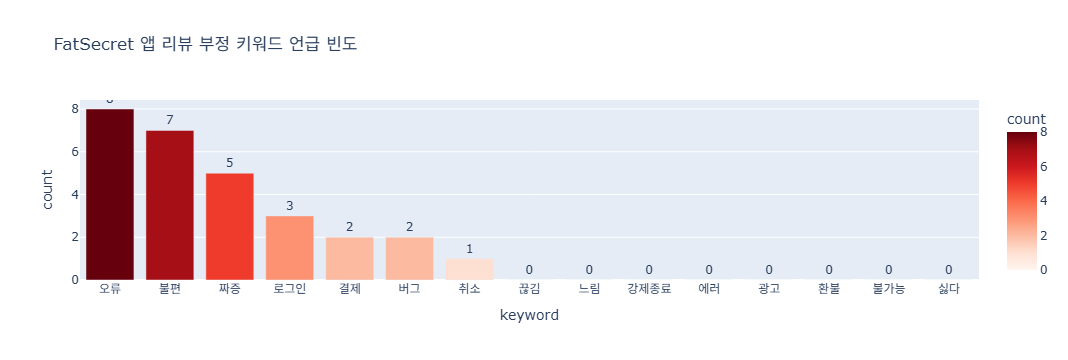

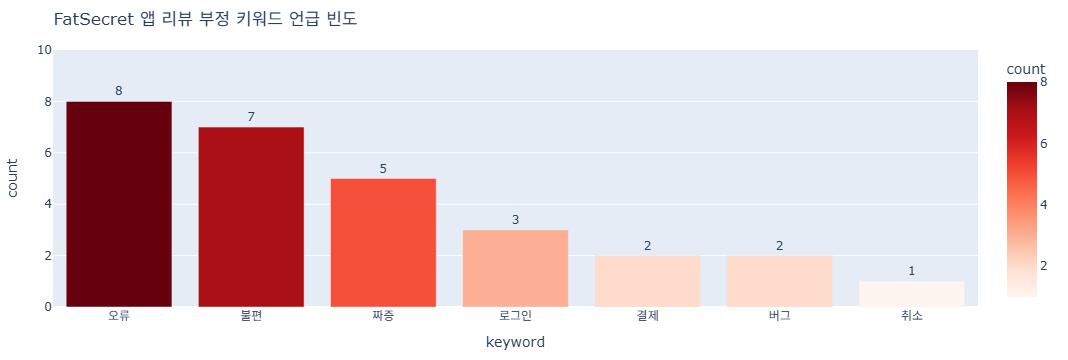

In [3]:
import pandas as pd
import re
import plotly.express as px

# 1. 엑셀 데이터 불러오기
file_path = "fatsecret_playstore_reviews_full 3.xlsx"
df = pd.read_excel(file_path, sheet_name="fatsecret_playstore_reviews_ful")

# 2. 텍스트 전처리
df["content"] = df["content"].astype(str).str.strip()

# 3. 부정 키워드 리스트 정의
neg_keywords = [
    "오류", "에러", "불편", "버그", "강제종료",
    "느림", "끊김", "로그인", "광고", "결제",
    "취소", "환불", "불가능", "싫다", "짜증"
]

# 4. 각 리뷰에서 키워드 등장 횟수 카운트
for kw in neg_keywords:
    df[kw] = df["content"].apply(lambda x: len(re.findall(kw, x)))

# 5. 키워드별 총합 집계
neg_counts = df[neg_keywords].sum().sort_values(ascending=False)

# 6. 0 이상만 필터링
neg_df = neg_counts[neg_counts > 0].reset_index()
neg_df.columns = ["keyword", "count"]

# 7. Plotly 시각화 (y축 여유 공간 확보)
fig = px.bar(
    neg_df,
    x="keyword",
    y="count",
    title="FatSecret 앱 리뷰 부정 키워드 언급 빈도",
    text="count",
    color="count",
    color_continuous_scale="Reds"
)

# 숫자 표시는 막대 위에, 잘림 방지를 위해 y축 범위 늘림
fig.update_traces(textposition="outside")
fig.update_layout(
    yaxis=dict(range=[0, neg_df["count"].max() + 2]),
    margin=dict(t=50, b=50, l=50, r=80)
)

fig.show()


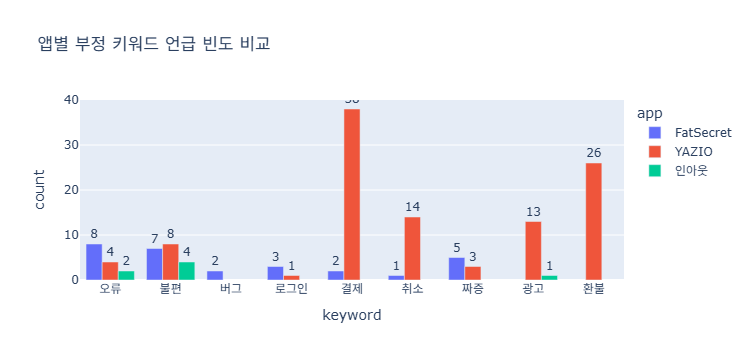

In [4]:
import pandas as pd
import re
import plotly.express as px

# 1. 파일 경로 설정
files = {
    "FatSecret": "fatsecret_playstore_reviews_full 3.xlsx",
    "YAZIO": "YAZIO_playstore_reviews_full 3.xlsx",
    "인아웃": "인아웃_playstore_reviews_full2.xlsx"
}

# 2. 부정 키워드 리스트 정의
neg_keywords = [
    "오류", "에러", "불편", "버그", "강제종료",
    "느림", "끊김", "로그인", "광고", "결제",
    "취소", "환불", "불가능", "싫다", "짜증"
]

# 3. 결과 저장 리스트
app_results = []

# 4. 각 앱별로 데이터 처리
for app_name, path in files.items():
    # 파일 열기
    xls = pd.ExcelFile(path)
    df = pd.read_excel(path, sheet_name=xls.sheet_names[0])
    
    # 텍스트 전처리
    df["content"] = df["content"].astype(str).str.strip()
    
    # 키워드 카운트
    for kw in neg_keywords:
        df[kw] = df["content"].apply(lambda x: len(re.findall(kw, x)))
    
    # 키워드별 합계
    counts = df[neg_keywords].sum()
    counts = counts[counts > 0]  # 0인 키워드 제거
    
    # 결과 저장
    for kw, cnt in counts.items():
        app_results.append({"app": app_name, "keyword": kw, "count": cnt})

# 5. 결과 DataFrame 변환
result_df = pd.DataFrame(app_results)

# 6. Plotly 시각화
fig = px.bar(
    result_df,
    x="keyword",
    y="count",
    color="app",
    barmode="group",
    title="앱별 부정 키워드 언급 빈도 비교",
    text="count"
)

# 7. 숫자가 잘리지 않게 y축 범위 확장
fig.update_traces(textposition="outside")
fig.update_layout(yaxis=dict(range=[0, result_df["count"].max() + 2]))

fig.show()



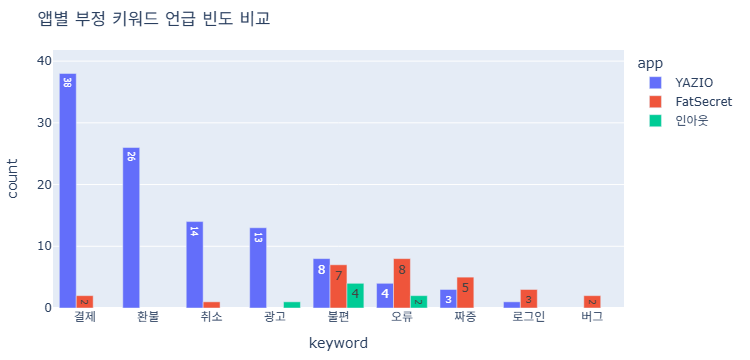

In [5]:
import pandas as pd
import re
import plotly.express as px

# 1. 파일 경로 설정
files = {
    "FatSecret": "fatsecret_playstore_reviews_full 3.xlsx",
    "YAZIO": "YAZIO_playstore_reviews_full 3.xlsx",
    "인아웃": "인아웃_playstore_reviews_full2.xlsx"
}

# 2. 부정 키워드 리스트 정의
neg_keywords = [
    "오류", "에러", "불편", "버그", "강제종료",
    "느림", "끊김", "로그인", "광고", "결제",
    "취소", "환불", "불가능", "싫다", "짜증"
]

# 3. 결과 저장 리스트
app_results = []

# 4. 각 앱별 데이터 처리
for app_name, path in files.items():
    xls = pd.ExcelFile(path)
    df = pd.read_excel(path, sheet_name=xls.sheet_names[0])
    df["content"] = df["content"].astype(str).str.strip()
    
    # 키워드 카운트
    for kw in neg_keywords:
        df[kw] = df["content"].apply(lambda x: len(re.findall(kw, x)))
    
    counts = df[neg_keywords].sum()
    counts = counts[counts > 0]  # 0 제거
    
    for kw, cnt in counts.items():
        app_results.append({"app": app_name, "keyword": kw, "count": cnt})

# 5. DataFrame 변환 및 정렬
result_df = pd.DataFrame(app_results)
result_df = result_df.sort_values(by="count", ascending=False)

# 6. 숫자 축약 함수
def shorten_number(num):
    if num >= 1000000:
        return f"{num/1000000:.1f}M"
    elif num >= 1000:
        return f"{num/1000:.1f}K"
    else:
        return str(num)

result_df["count_short"] = result_df["count"].apply(shorten_number)

# 7. Plotly 시각화
fig = px.bar(
    result_df,
    x="keyword",
    y="count",
    color="app",
    barmode="group",
    title="앱별 부정 키워드 언급 빈도 비교",
    text="count_short"
)

# 8. 숫자가 차트 밖으로 안 나가도록 inside 위치
fig.update_traces(textposition="inside")

# 9. 여백 조정
fig.update_layout(
    yaxis=dict(range=[0, result_df["count"].max() * 1.1]),  # 약간 여유 공간
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.show()



NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[fys1fd]"}
  (Session info: chrome=140.0.7339.129); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#nosuchelementexception
Stacktrace:
	GetHandleVerifier [0x0x57c333+65459]
	GetHandleVerifier [0x0x57c374+65524]
	(No symbol) [0x0x39d973]
	(No symbol) [0x0x3e76e7]
	(No symbol) [0x0x3e7a8b]
	(No symbol) [0x0x42dea2]
	(No symbol) [0x0x409e44]
	(No symbol) [0x0x42b606]
	(No symbol) [0x0x409bf6]
	(No symbol) [0x0x3db38e]
	(No symbol) [0x0x3dc274]
	GetHandleVerifier [0x0x7feda3+2697763]
	GetHandleVerifier [0x0x7f9ec7+2677575]
	GetHandleVerifier [0x0x5a4194+228884]
	GetHandleVerifier [0x0x5949f8+165496]
	GetHandleVerifier [0x0x59b18d+192013]
	GetHandleVerifier [0x0x5847d8+99416]
	GetHandleVerifier [0x0x584972+99826]
	GetHandleVerifier [0x0x56ebea+10346]
	BaseThreadInitThunk [0x0x766a5d49+25]
	RtlInitializeExceptionChain [0x0x7711d6db+107]
	RtlGetAppContainerNamedObjectPath [0x0x7711d661+561]


In [11]:
import plotly.express as px

# 별점 숫자 추출
all_reviews["rating_num"] = all_reviews["rating"].str.extract(r"(\d)").astype(float)

# 별점 분포 집계
rating_counts = all_reviews["rating_num"].value_counts().sort_index().reset_index()
rating_counts.columns = ["rating", "count"]

# Plotly 막대그래프
fig = px.bar(
    rating_counts,
    x="rating",
    y="count",
    text="count",
    title="중복 제거된 리뷰의 별점 분포",
    labels={"rating": "별점", "count": "리뷰 수"}
)
fig.update_traces(textposition="outside")
fig.update_layout(xaxis=dict(dtick=1))

fig.show()


NameError: name 'all_reviews' is not defined

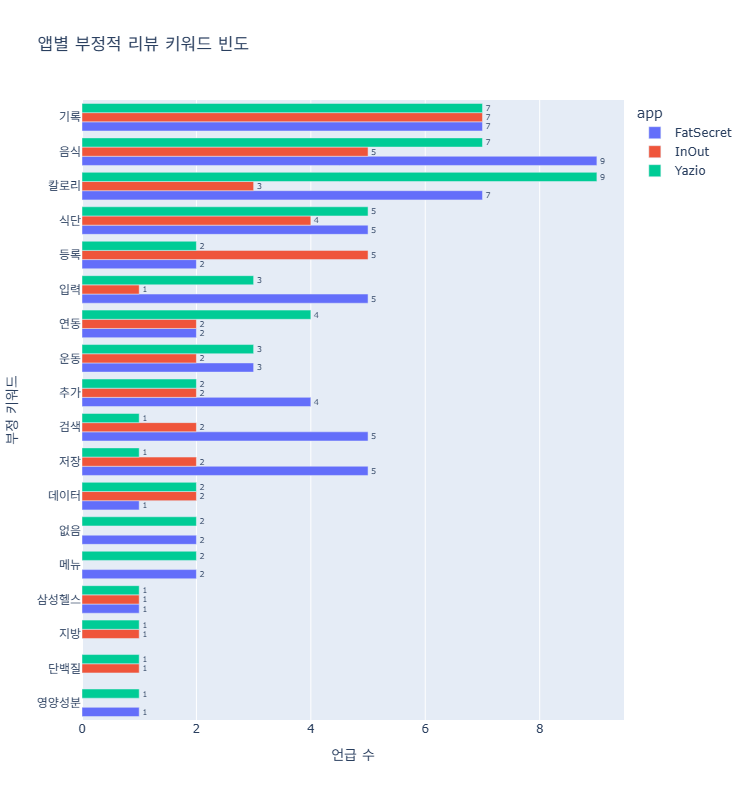

In [3]:
import pandas as pd
import plotly.express as px

# 파일 경로 (네가 올린 파일 이름 그대로 지정)
files = {
    "FatSecret": "fatsecret_playstore_reviews_full 3.xlsx",
    "Yazio": "YAZIO_playstore_reviews_full 3.xlsx",
    "InOut": "인아웃_playstore_reviews_full2-.xlsx"
}

# 부정 키워드 리스트 (원하는 대로 확장 가능)
negative_keywords = [
    "안됨", "작동","화면 ",
]

# 데이터를 합쳐서 전처리
all_data = []
for app, path in files.items():
    try:
        df = pd.read_excel(path)
        # 리뷰 텍스트 컬럼명 추정 (보통 'review', 'content' 등) → 없으면 직접 수정 필요
        col = [c for c in df.columns if "review" in c.lower() or "content" in c.lower()]
        if col:
            text_col = col[0]
        else:
            text_col = df.columns[0]  # 첫 번째 열을 임시로 리뷰로 처리
        df["app"] = app
        df = df[[text_col, "app"]].rename(columns={text_col: "review"})
        all_data.append(df)
    except Exception as e:
        print(f"{app} 파일 처리 오류:", e)

reviews = pd.concat(all_data, ignore_index=True)

# 부정 키워드 카운트
counts = []
for app in reviews["app"].unique():
    app_reviews = reviews[reviews["app"] == app]["review"].dropna().astype(str)
    for kw in negative_keywords:
        n = app_reviews.str.contains(kw, case=False).sum()
        if n > 0:  # 0회 언급 키워드는 제거
            counts.append({"app": app, "keyword": kw, "count": n})

df_counts = pd.DataFrame(counts)

# 정렬
df_counts = df_counts.sort_values(["app", "count"], ascending=[True, False])

# Plotly 시각화 (가로 막대)
fig = px.bar(
    df_counts,
    x="count",
    y="keyword",
    color="app",
    orientation="h",
    text="count",
    title="앱별 부정적 리뷰 키워드 빈도"
)

fig.update_traces(textposition="inside", insidetextanchor="start")
fig.update_layout(
    xaxis_title="언급 수",
    yaxis_title="부정 키워드",
    yaxis=dict(categoryorder="total ascending"),
    barmode="group",
    height=800
)

fig = px.bar(
    df_counts,
    x="count",
    y="keyword",
    color="app",
    orientation="h",
    text="count",
    title="앱별 부정적 리뷰 키워드 빈도"
)

# 숫자를 막대 밖에 표시
fig.update_traces(
    textposition="outside",
    textfont_size=12
)

fig.update_layout(
    xaxis_title="언급 수",
    yaxis_title="부정 키워드",
    yaxis=dict(categoryorder="total ascending"),
    barmode="group",
    height=800
)


fig.show()


C:\Users\pmj96\AppData\Local\Temp\ipykernel_16972\1895784560.py:82: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\pmj96\AppData\Local\Temp\ipykernel_16972\1895784560.py:82: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\pmj96\AppData\Local\Temp\ipykernel_16972\1895784560.py:82: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

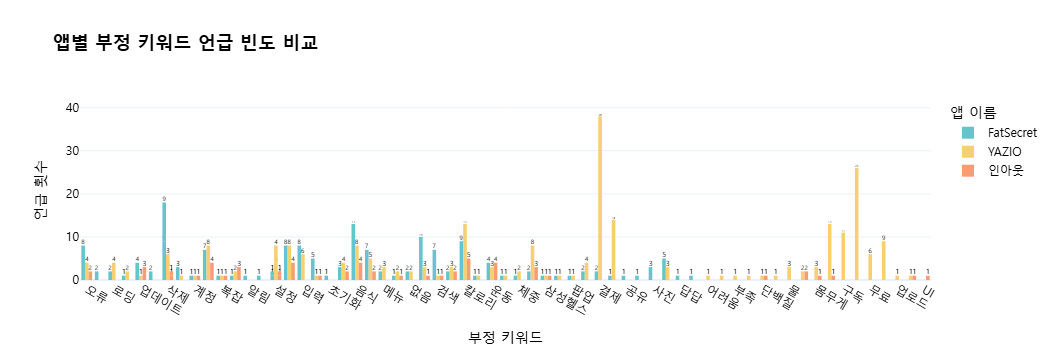

In [4]:
import pandas as pd
import re
import plotly.express as px
import plotly.io as pio

# 폰트 설정 (한글 깨짐 방지)
pio.templates.default = "plotly_white" # 기본 템플릿 설정
# Plotly에 한글 폰트 적용 (시스템에 폰트가 설치되어 있어야 함)
# 예: Windows의 경우 'Malgun Gothic', macOS의 경우 'AppleGothic'
# fig.update_layout(font_family="Malgun Gothic") 등으로 개별 적용 가능

# 1. 파일 경로 설정 (가상의 파일 경로로 대체)
files = {
    "FatSecret": "fatsecret_playstore_reviews_full 3.xlsx",
    "YAZIO": "YAZIO_playstore_reviews_full 3.xlsx",
    "인아웃": "인아웃_playstore_reviews_full2.xlsx"
}

# 2. 식단 어플 관련 부정 키워드 리스트 정의
# 위에서 제안된 키워드를 기반으로 더 상세하게 구성
neg_keywords = [
    # 일반적인 앱 문제
    "오류", "에러", "버그", "강제종료", "멈춤", "튕김",
    "느림", "로딩", "끊김", "반응없음", "렉",
    "업데이트", "호환", "설치", "삭제",
    "로그인", "회원가입", "인증", "탈퇴", "계정", "정보유출",

    # UI/UX 및 사용성 문제
    "불편", "어려움", "복잡", "헷갈림", "직관적", "사용성",
    "디자인", "화면", "레이아웃", "글씨", "작음", "가독성", "UI", "UX",
    "알림", "소리", "진동", "설정",

    # 식단/영양 기록 및 관리 문제
    "기록", "입력", "저장", "누락", "사라짐", "초기화", "삭제", "수정",
    "음식", "식단", "메뉴", "데이터", "부족", "없음", "추가", "검색", "등록", "음식점", "외식",
    "칼로리", "영양성분", "탄수화물", "단백질", "지방", "나트륨", "당류", "정확도", "오차", "틀림",
    "물", "수분", "운동", "활동량",

    # 목표 및 통계 기능 문제
    "목표", "설정", "변경", "달성", "체중", "몸무게", "감량", "증가", "유지",
    "그래프", "통계", "분석", "리포트", "보고서", "시각화",

    # 연동/기기 문제
    "연동", "미밴드", "애플워치", "삼성헬스", "웨어러블", "기기",

    # 프리미엄/결제/광고 문제
    "광고", "팝업", "프리미엄", "결제", "구독", "환불", "취소", "가격", "비쌈", "혜택",
    "무료", "유료", "할인", "쿠폰", "카드", "결제오류",

    # 커뮤니티/상호작용 문제
    "커뮤니티", "친구", "공유", "게시글", "댓글", "사진", "업로드",

    # 감정적인 표현
    "싫다", "짜증", "최악", "실망", "불만", "어이없다", "답답", "화남", "별로", "황당"
]

# 3. 결과 저장 리스트
app_results = []

# 4. 각 앱별로 데이터 처리
for app_name, path in files.items():
    try:
        # 파일 열기
        xls = pd.ExcelFile(path)
        df = pd.read_excel(path, sheet_name=xls.sheet_names[0])
        
        # 'content' 컬럼이 없는 경우 건너뛰기
        if 'content' not in df.columns:
            print(f"경고: '{app_name}' 파일에 'content' 컬럼이 없습니다. 건너뜝니다.")
            continue

        # 텍스트 전처리
        df["content"] = df["content"].astype(str).str.strip()
        
        # 키워드 카운트
        for kw in neg_keywords:
            # 정규표현식 사용하여 키워드 카운트 (대소문자 무시 및 단어 경계 처리)
            # kw = "오류", pattern = r'\b오류\b' -> "오류"라는 단어만 매칭
            # 하지만 한글은 띄어쓰기가 없어서 단어 경계 \b가 제대로 작동 안 할 수 있음.
            # 여기서는 단순히 포함 여부로 매칭하고, 필요한 경우 \s(공백) 등을 추가 고려.
            # 여기서는 단순히 kw를 포함하는 경우로 처리합니다.
            df[kw] = df["content"].apply(lambda x: len(re.findall(kw, x, re.IGNORECASE)))
        
        # 키워드별 합계
        counts = df[neg_keywords].sum()
        counts = counts[counts > 0]  # 0인 키워드 제거
        
        # 결과 저장
        for kw, cnt in counts.items():
            app_results.append({"app": app_name, "keyword": kw, "count": cnt})

    except FileNotFoundError:
        print(f"오류: 파일 '{path}'를 찾을 수 없습니다. 해당 앱 ({app_name})은 건너뜝니다.")
    except Exception as e:
        print(f"'{app_name}' 앱 데이터 처리 중 오류 발생: {e}")


# 5. 결과 DataFrame 변환
result_df = pd.DataFrame(app_results)

# 6. Plotly 시각화
if not result_df.empty:
    fig = px.bar(
        result_df,
        x="keyword",
        y="count",
        color="app",
        barmode="group",
        title="<b>앱별 부정 키워드 언급 빈도 비교</b>", # 제목 강조
        text="count",
        labels={"keyword": "부정 키워드", "count": "언급 횟수", "app": "앱 이름"}, # 라벨 한글화
        color_discrete_sequence=px.colors.qualitative.Pastel # 색상 팔레트 변경
    )

    # 7. 숫자가 잘리지 않게 y축 범위 확장 및 텍스트 위치 조정
    fig.update_traces(textposition="outside", marker_line_width=0) # 막대 테두리 제거
    fig.update_layout(
        yaxis=dict(range=[0, result_df["count"].max() * 1.1]), # y축 범위 10% 확장
        hovermode="x unified", # 호버 시 정보 통합
        font=dict(family="Malgun Gothic", size=12, color="black"), # 폰트 설정 (Windows 기준)
        title_font_size=18,
        xaxis_title_font_size=14,
        yaxis_title_font_size=14,
        legend_title_font_size=14
    )

    fig.show()
else:
    print("분석할 데이터가 없습니다. 파일 경로 및 내용을 확인해주세요.")

In [9]:
pip install caas_jupyter_tools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement caas_jupyter_tools (from versions: none)
ERROR: No matching distribution found for caas_jupyter_tools


In [13]:
import pandas as pd
import re
from konlpy.tag import Okt # 형태소 분석기
from collections import defaultdict
from IPython.display import display

# --- 1. 파일 경로 설정 및 텍스트 로드 ---
# 파일 경로를 실제 파일 위치에 맞게 수정해주세요.
# 예시: 주피터 노트북 파일과 같은 디렉토리에 있다면 파일 이름만 사용
file1 = "KakaoTalk_20250926_1722_06_896_group.txt"
file2 = "KakaoTalk_20250926_1722_26_392_group.txt"

# 파일이 존재하는지 확인하는 함수
def load_text_file(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            return f.read()
    except FileNotFoundError:
        print(f"오류: 파일 '{file_path}'를 찾을 수 없습니다. 경로를 다시 확인해주세요.")
        return None
    except Exception as e:
        print(f"파일 '{file_path}' 읽기 중 오류 발생: {e}")
        return None

text1 = load_text_file(file1)
text2 = load_text_file(file2)

if text1 is None or text2 is None:
    print("파일 로드 실패. 분석을 중단합니다.")
    exit() # 스크립트 종료

combined_text = text1 + "\n" + text2

print("--- 파일 로드 완료 ---")
print(f"총 텍스트 길이: {len(combined_text)} 자")

# --- 2. 형태소 분석기 준비 ---
okt = Okt()

# --- 3. 이너컬리 브랜드 맞춤 부정 키워드 리스트 정의 ---
# 이너뷰티, 건강식품, 여성 건강 제품군에 초점을 맞춰 키워드 구성
neg_keywords = [
    # 제품 자체 문제
    "효과없", "효과 없", "효과 못", "변화없", "변화 없", "차이없", "차이 없", # 효과 없음
    "비싸", "가격", "부담", "가성비", # 가격
    "불편", "번거롭", "섭취", "먹기", # 섭취 불편
    "냄새", "맛없", "역겹", "거부감", # 맛/냄새
    "부작용", "속쓰림", "설사", "피부트러블", "두드러기", "가렵", "알레르기", "안맞", # 부작용
    "성분", "불안", "의심", "성분문제", # 성분 불안
    "품절", "재고", "배

SyntaxError: unterminated string literal (detected at line 50) (1607028189.py, line 50)